In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("lung_cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


**About the column variables**

The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the kaggle website .

Total no. of attributes:16 No .of instances:284 Attribute information: 1. Gender: M(male), F(female) 2. Age: Age of the patient 3. Smoking: YES=2 , NO=1. 4. Yellow fingers: YES=2 , NO=1. 5. Anxiety: YES=2 , NO=1. 6. Peer_pressure: YES=2 , NO=1. 7. Chronic Disease: YES=2 , NO=1. 8. Fatigue: YES=2 , NO=1. 9. Allergy: YES=2 , NO=1. 10. Wheezing: YES=2 , NO=1. 11. Alcohol: YES=2 , NO=1. 12. Coughing: YES=2 , NO=1. 13. Shortness of Breath: YES=2 , NO=1. 14. Swallowing Difficulty: YES=2 , NO=1. 15. Chest pain: YES=2 , NO=1. 16. Lung Cancer: YES , NO.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

###  **Dataset Overview**
- **Shape**: 309 rows × 16 columns
- **No missing values** 
- **Target variable**: `LUNG_CANCER` (values: `YES`, `NO`)
- **Binary Features**: 14 binary or categorical features (mostly with values 1 and 2)
- **Numerical Feature**: 1 numerical feature (`AGE`)

---

###  **Column Types & Observations**
| Column                   | Type    | Description / Inference |
|--------------------------|---------|--------------------------|
| `GENDER`                 | Object  | Categorical: M / F       |
| `AGE`                    | Numeric | Ranges from 21–87, mean ~63 |
| All others (e.g. `SMOKING`, `ANXIETY`, etc.) | Binary/Ordinal (1 or 2) | coded as `1 = No`, `2 = Yes` or vice versa |
| `LUNG_CANCER`            | Object  | Binary Target: YES / NO (Imbalanced: ~87% YES) |

---

###  Class Imbalance
- **YES**: 270 (87%)
- **NO**: 39 (13%)

May require **resampling** (SMOTE, undersampling) or **class weighting** during model training.

---

### Feature Distribution 
- All binary features are fairly balanced (approx. 50/50 split) except for:
  - `FATIGUE`, `SHORTNESS OF BREATH`, `COUGHING`: Skewed more toward `2`
- `AGE` has a good spread (mean ~63), with most values in the 50–70 range.

### EDA and Visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize column names
df.columns = df.columns.str.strip().str.upper()

# Map binary categorical columns (1/2) to 0/1
binary_cols = df.columns.difference(['GENDER', 'AGE', 'LUNG_CANCER'])
df[binary_cols] = df[binary_cols].applymap(lambda x: 0 if x == 1 else 1)

# Map target variable
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Encode GENDER
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df

C:\Users\MANASWINIKANTAYPALLI\AppData\Local\Temp\ipykernel_12200\2782664867.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 0 if x == 1 else 1)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


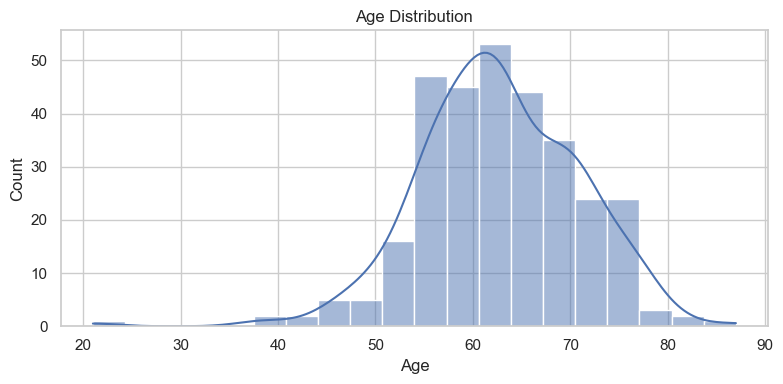

In [52]:
import seaborn as sns

# Set figure style
sns.set(style='whitegrid')

# Plot: Distribution of Age
plt.figure(figsize=(8, 4))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


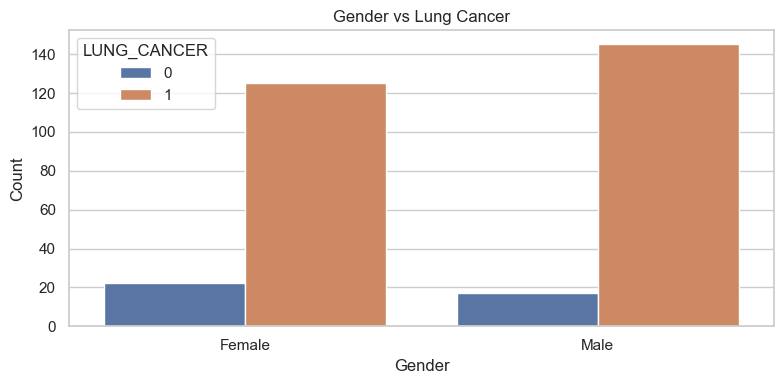

In [78]:
# Labels distribution

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='GENDER', hue='LUNG_CANCER')
plt.title('Gender vs Lung Cancer')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])  # if GENDER is 0/1
plt.tight_layout()
plt.show()

In [6]:
# Class distribution
class_dist = df['LUNG_CANCER'].value_counts(normalize=True) * 100
class_dist_output = class_dist.round(2).astype(str) + '%'
class_dist_output


LUNG_CANCER
1    87.38%
0    12.62%
Name: proportion, dtype: object

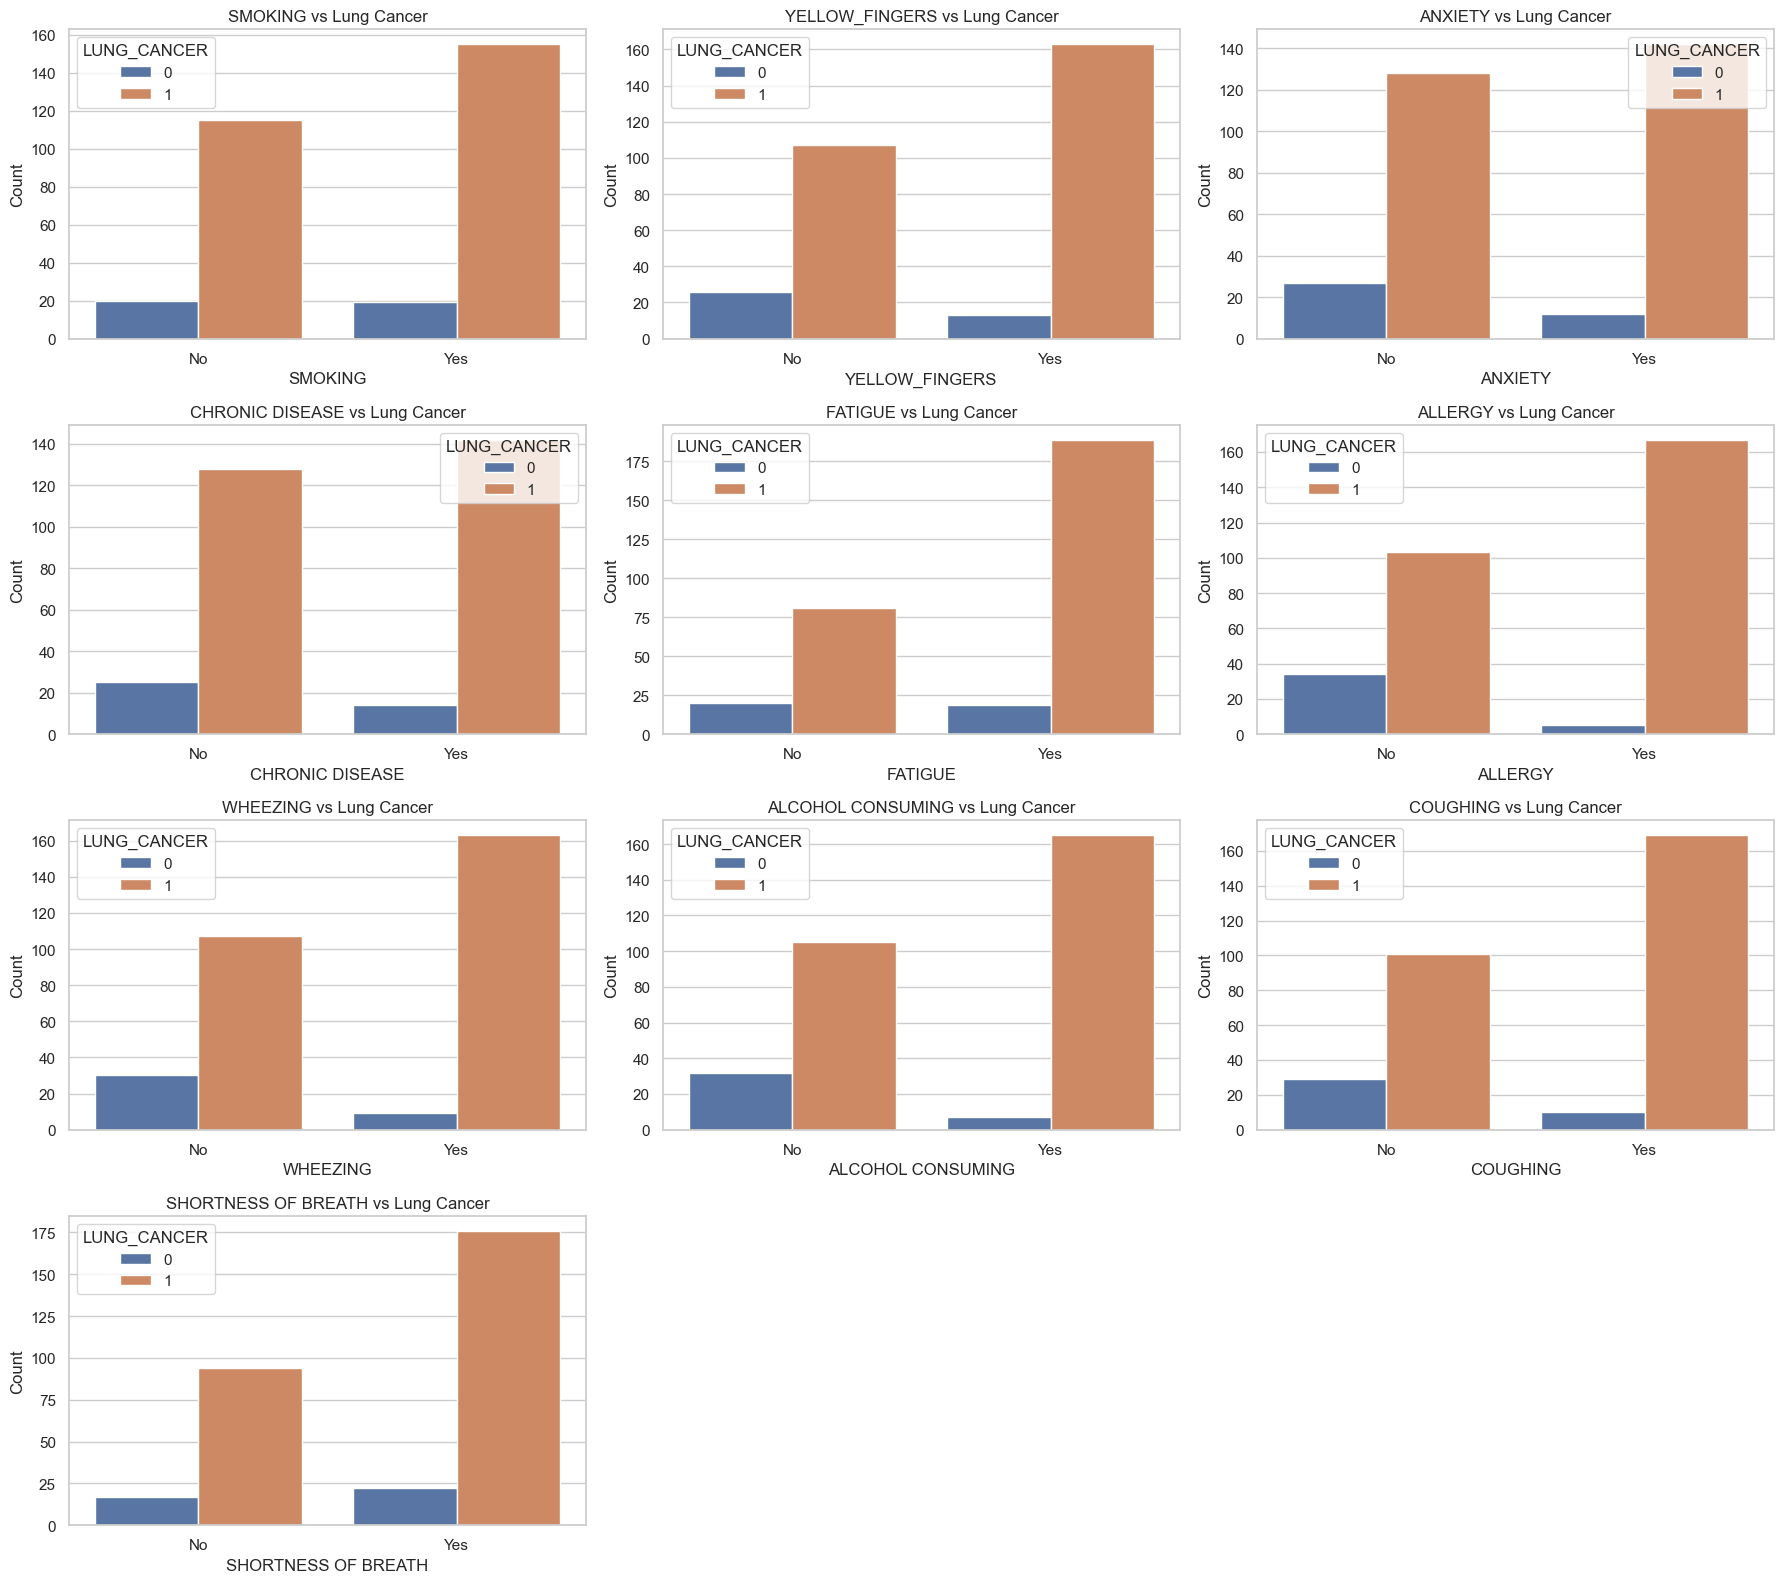

In [7]:
# Distribution of Categorical Features
# Set up seaborn style
sns.set(style='whitegrid')

# List of selected categorical/binary features for comparison
cat_features = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'CHRONIC DISEASE',
                'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
                'COUGHING', 'SHORTNESS OF BREATH']

# Create a grid of plots: each feature vs lung cancer status
plt.figure(figsize=(18, 16))

for i, col in enumerate(cat_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col, hue='LUNG_CANCER')
    plt.title(f'{col} vs Lung Cancer')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

### Observations:

**Smoking:** Strong association with lung cancer – majority of smokers have lung cancer.

**Yellow Fingers:** Positively correlated – often seen in those with lung cancer.

**Chronic Disease, Anxiety, Fatigue, Wheezing, and Coughing:** All show a higher prevalence of lung cancer among those reporting “Yes”.

**Alcohol Consumption:** Also leans toward increased cancer cases but less stark than smoking.

**Allergy:** Shows minimal difference – may not be a strong predictor.



#### Strength of association between X and Y using mutual information

C:\Users\MANASWINIKANTAYPALLI\AppData\Local\Temp\ipykernel_12200\3291297473.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='magma')


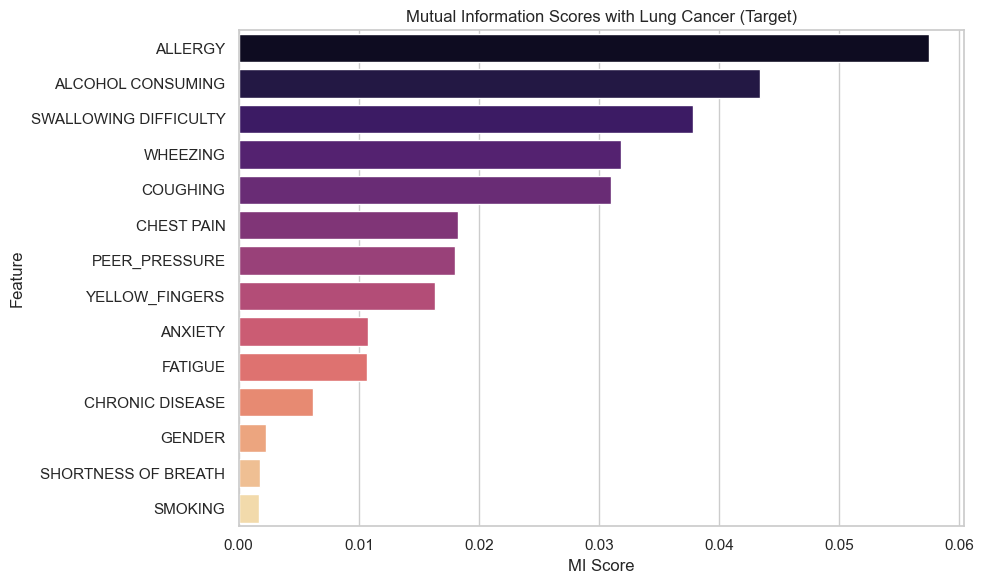

,Feature,MI Score
7,ALLERGY,0.057504
9,ALCOHOL CONSUMING,0.043414
12,SWALLOWING DIFFICULTY,0.037858
8,WHEEZING,0.031806
10,COUGHING,0.031021
13,CHEST PAIN,0.018221
4,PEER_PRESSURE,0.018029
2,YELLOW_FINGERS,0.016365
3,ANXIETY,0.010750
6,FATIGUE,0.010725


In [8]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target
X = df.drop(columns=['LUNG_CANCER','AGE'])
y = df['LUNG_CANCER']

# Ensure all columns in X are categorical or discrete
X_encoded = X.copy()
for col in X_encoded.columns:
    X_encoded[col] = X_encoded[col].astype('category')

# Compute Mutual Information
mi_scores = mutual_info_classif(X_encoded, y, discrete_features=True, random_state=0)

# Create a DataFrame of scores
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature', palette='magma')
plt.title('Mutual Information Scores with Lung Cancer (Target)')
plt.tight_layout()
plt.show()

mi_df

### Logistic Regression Model with class weighing

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
# Define features and target

X = df.drop(columns='LUNG_CANCER')
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [14]:
# Logistic Regression pipeline with class_weight='balanced'
logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
cv_scores.mean()

0.862204081632653

In [85]:
# Fit and evaluate
logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.85      0.92        54

    accuracy                           0.87        62
   macro avg       0.75      0.93      0.79        62
weighted avg       0.94      0.87      0.89        62



In [15]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix - Logistic Regression (Balanced)')
plt.tight_layout()
plt.show()

NameError: name 'y_pred' is not defined

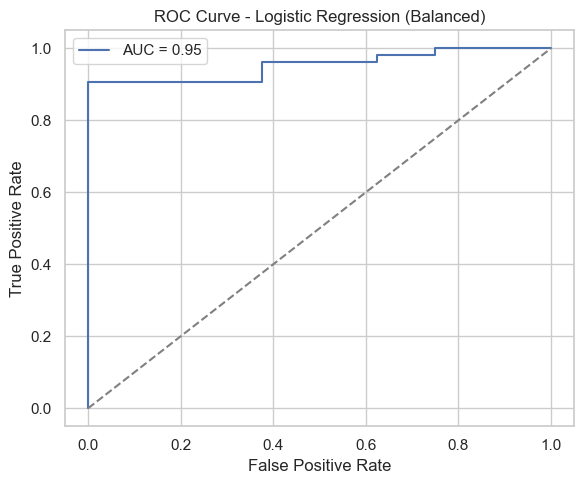

In [86]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title('ROC Curve - Logistic Regression (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


### RandomForest with SMOTENC resampling technique

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline


In [17]:
df_encoded = df.copy()
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [18]:
# Step 3: Define X and y
X = df_encoded.drop(columns='LUNG_CANCER')
y = df_encoded['LUNG_CANCER']

# Step 4: Identify categorical column indices for SMOTENC
categorical_cols = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
cat_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
cat_indices


[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [19]:
# Step 6: Create SMOTENC + RF pipeline
rf_pipeline = ImbPipeline(steps=[
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Step 7: Cross-validation on training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f'CV Accuracy: {cv_scores.mean():.4f}')

# Step 8: Fit the pipeline and predict
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
y_proba = rf_pipeline.predict_proba(X_test)[:, 1]

# Step 9: Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


CV Accuracy: 0.9111
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.98      0.93      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.90      0.84        62
weighted avg       0.94      0.92      0.92        62



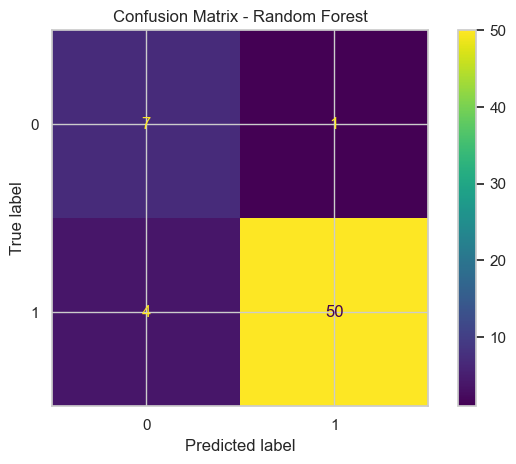

In [41]:
# Step 11: Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

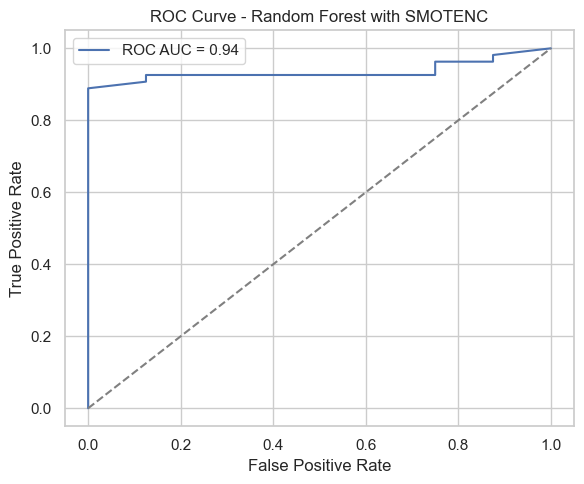

In [20]:
# Step 10: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest with SMOTENC')
plt.legend()
plt.tight_layout()
plt.show()


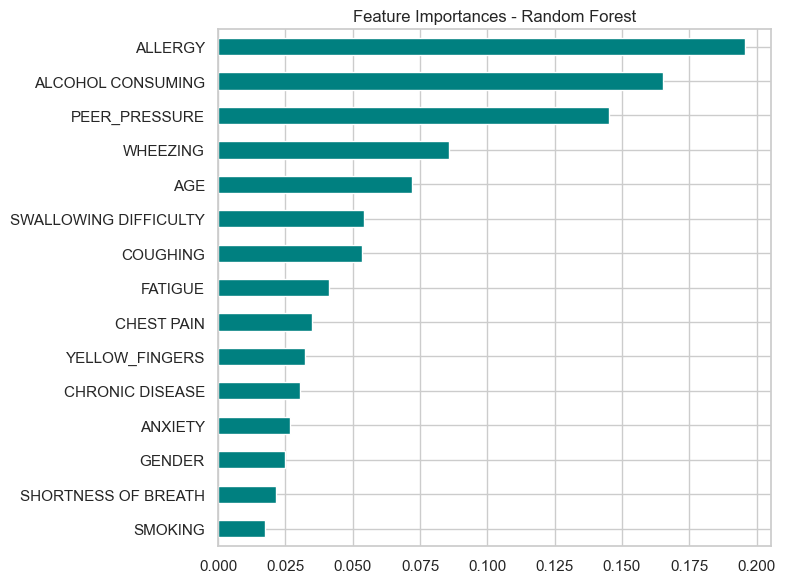

In [66]:

# Step 12: Feature Importances
rf_model = rf_pipeline.named_steps['rf']
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color='teal')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

### XGBOOST with SMOTENC resampling

In [23]:
!pip install xgboost
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay


In [24]:
# Step 1: Define the pipeline
xgb_pipeline = ImbPipeline(steps=[
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Step 2: Fit the model
xgb_pipeline.fit(X_train, y_train)

# Step 3: Predictions
y_pred = xgb_pipeline.predict(X_test)
y_proba = xgb_pipeline.predict_proba(X_test)[:, 1]

# Step 4: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.96      0.91      0.93        54

    accuracy                           0.89        62
   macro avg       0.75      0.83      0.78        62
weighted avg       0.91      0.89      0.89        62



C:\Users\MANASWINIKANTAYPALLI\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:33:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


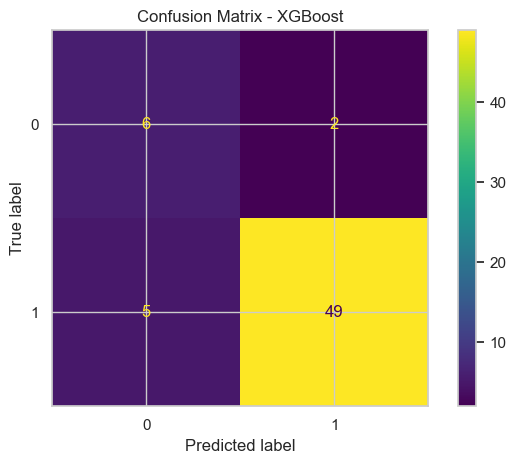

In [25]:

# Step 6: Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix - XGBoost')
plt.tight_layout()
plt.show()


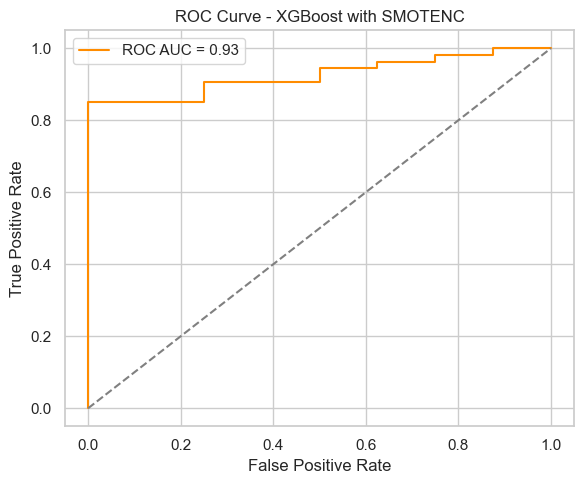

In [69]:
# Step 5: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost with SMOTENC')
plt.legend()
plt.tight_layout()
plt.show()


#### Observations:
- The recall score for class '1' (Lung Cancer positive) is very impressive in randomForest with SMOTENC compared with Logistic Regression and XGBOOSt models
- It is decided to do hyper parameter tuning with RandomForest for any possible improvement

### Hyperparameter tuning using RandomForest and SMOTENC

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:
 {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.91      0.93      0.92        54

    accuracy                           0.85        62
   macro avg       0.67      0.65      0.66        62
weighted avg       0.85      0.85      0.85        62



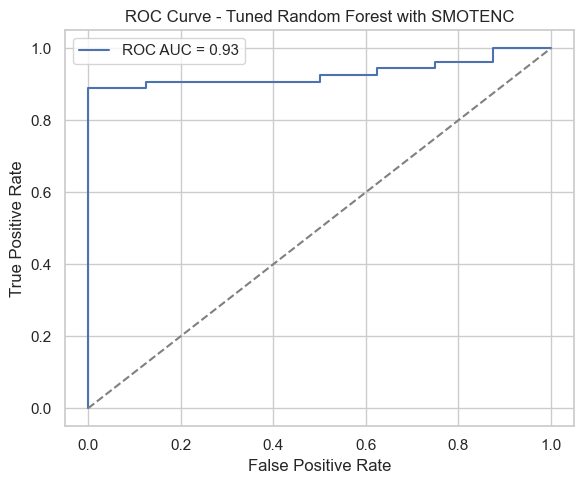

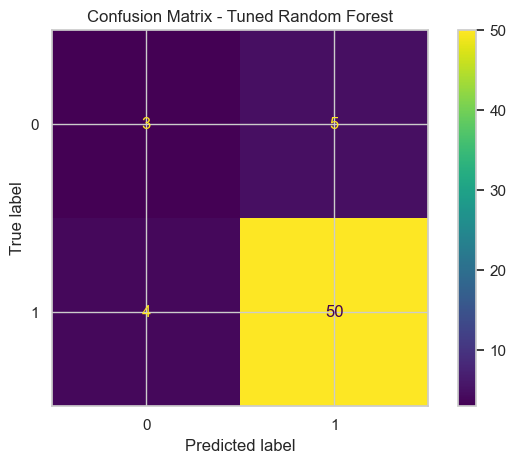

In [26]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

# Step 1: Define the SMOTENC-aware pipeline again
pipeline = ImbPipeline(steps=[
    ('smote', SMOTENC(categorical_features=cat_indices, random_state=42)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Step 2: Define parameter grid for RandomForest
param_dist = {
    'rf__n_estimators': [50, 100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 6, 10],
    'rf__min_samples_leaf': [1, 3, 5],
}

# Step 3: RandomizedSearchCV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = GridSearchCV(
    pipeline,
    param_grid=param_dist,
    cv=cv,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Step 4: Fit to training data
search.fit(X_train, y_train)

# Step 5: Report best parameters and test performance
print("Best Parameters:\n", search.best_params_)

# Step 6: Predict on test data
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Step 7: Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest with SMOTENC')
plt.legend()
plt.tight_layout()
plt.show()

# Step 9: Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix - Tuned Random Forest')
plt.tight_layout()
plt.show()


#### Observations:
- The hyper parameter tuning did not yield any improved results
- It is decided to finalize the RandomForestClassifier with SMOTENC resampling
- The best model parameters are n_estimators = 100 and all default values
- This model will be used for deployment


In [27]:
# Save the trained model pipeline
import joblib
joblib.dump(rf_pipeline, 'rf_smote_pipeline.pkl')
print("The final model model saved as 'rf_smote_pipeline.pkl'")

The final model model saved as 'rf_smote_pipeline.pkl'
